# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: c:\Users\nitig\.pyenv\pyenv-win\versions\3.11.9\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Print available plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [3]:
# Load the dataset
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [4]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
year = "Year"
avg_temperature = "Global Average Temperature (°C)"
co2_concentration = "CO2 Concentration (ppm)"
sea_level_rise = "Sea Level Rise (mm)"
arctic_ice_area = "Arctic Ice Area (million km²)"

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [5]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# TODO: Aggregate data by year to create a 124-year time series
yearly_data = df.groupby("Year")[[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area]].mean().reset_index()
yearly_data.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


In [6]:
yearly_data.count()

Year                               124
Global Average Temperature (°C)    124
CO2 Concentration (ppm)            124
Sea Level Rise (mm)                124
Arctic Ice Area (million km²)      124
dtype: int64

## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics:
              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min            

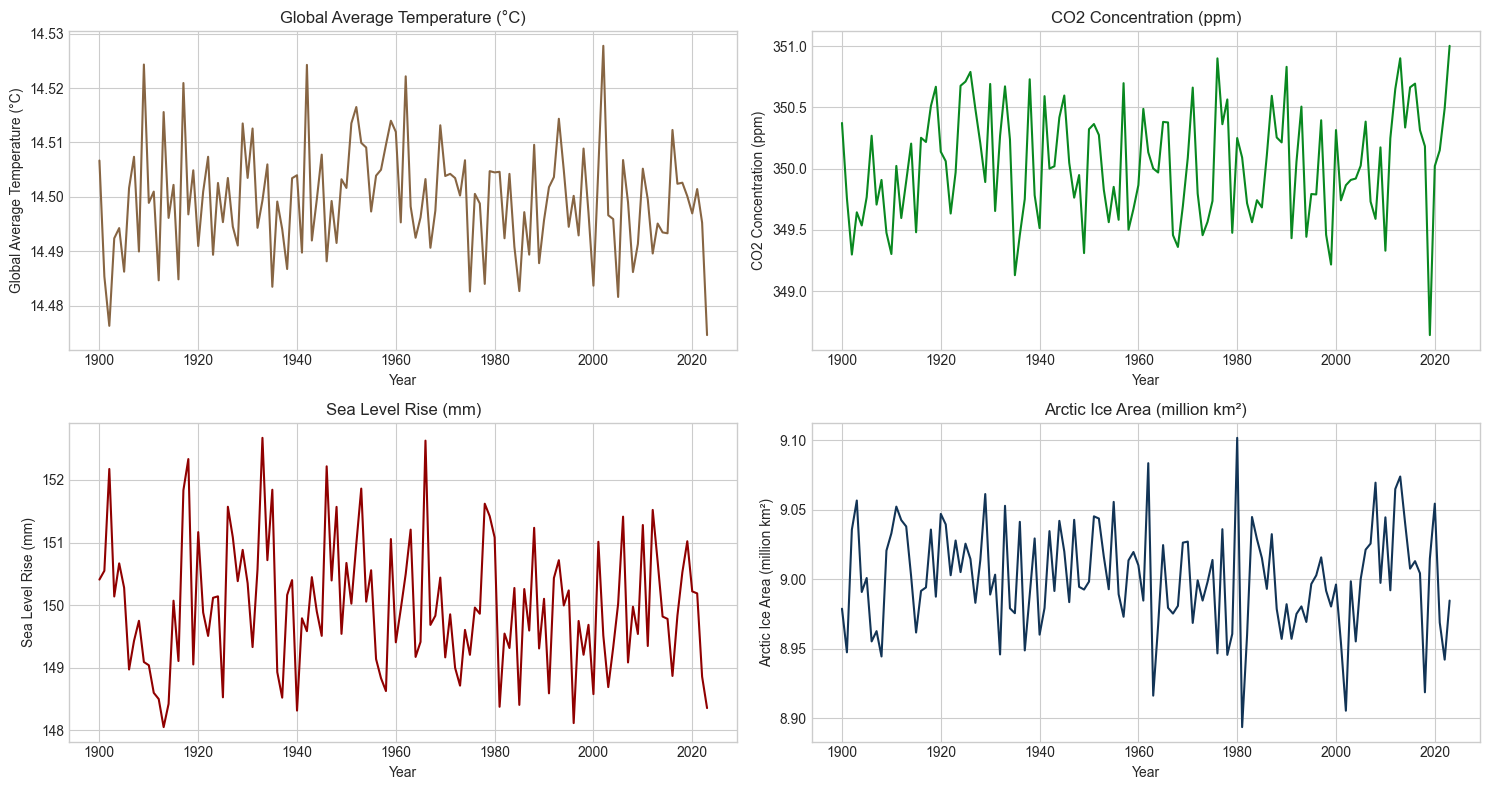

In [7]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Descriptive statistics for each variable
# describe used for mean, median, standard devition
print("Descriptive Statistics:")
print(yearly_data.describe())
print("\nVisualizations:")  # You can use line plots, histograms, or density plots
# Line plot for temperature over time
print("Lineplot:")
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#Lineplot for Global average temperature vs Year
sns.lineplot(data=yearly_data, x="Year", y=avg_temperature, ax=axes[0,0], color="#876543")
axes[0,0].set_title(avg_temperature)

#Lineplot for Co2 Concentration vs Year
sns.lineplot(data=yearly_data, x="Year", y=co2_concentration, ax=axes[0,1], color="#098820")
axes[0,1].set_title(co2_concentration)

#Lineplot for Sea Level rise vs Year
sns.lineplot(data=yearly_data, x="Year", y=sea_level_rise, ax=axes[1,0], color="#900000")
axes[1,0].set_title(sea_level_rise)

#Lineplot for Arctic Ice Area vs Year
sns.lineplot(data=yearly_data, x="Year", y=arctic_ice_area, ax=axes[1,1], color="#123456")
axes[1,1].set_title(arctic_ice_area)

plt.tight_layout()
plt.show()

Box Plot analysis on CO2 Concentration (ppm):


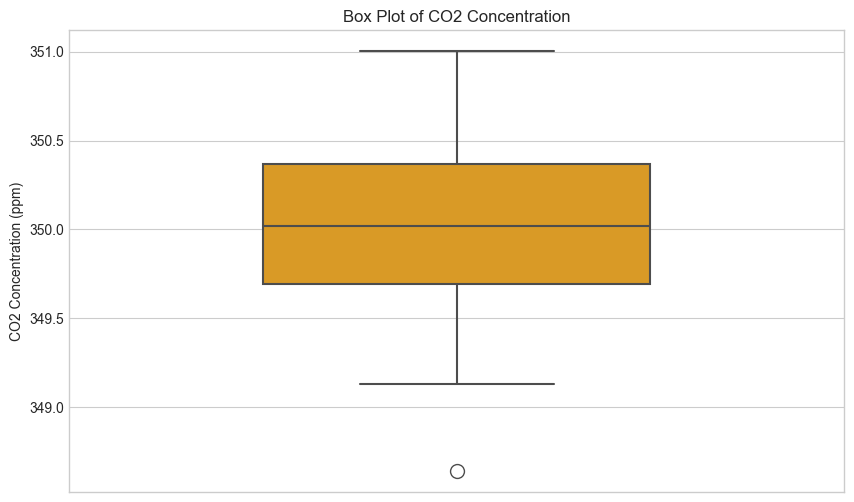

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Violin Plot for Sea Level Rise (mm)


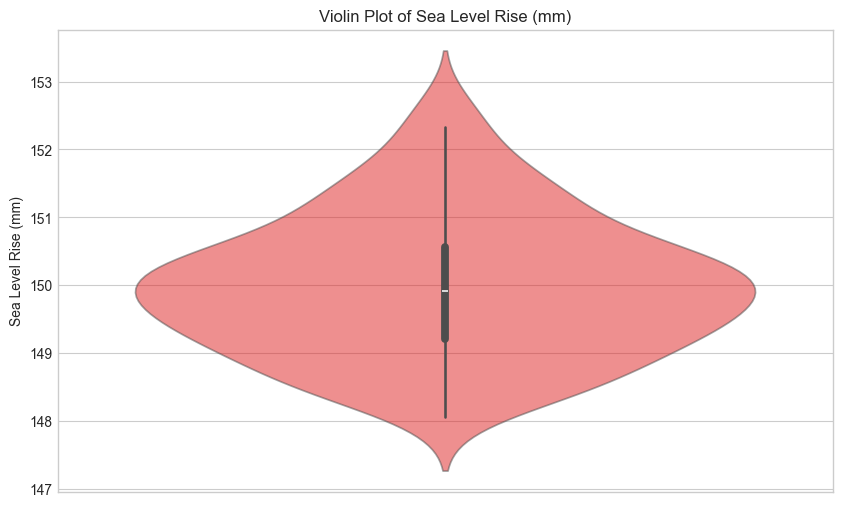

count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


In [8]:
#Box plot for CO2 concentrations
print("Box Plot analysis on CO2 Concentration (ppm):")
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_data, y = co2_concentration,color="orange", linewidth=1.5, width=0.5, fliersize=10, saturation=0.7)
plt.title('Box Plot of CO2 Concentration')
plt.show()
print(yearly_data[co2_concentration].describe())

# Violin plot for Sea Level Rise
print(f"Violin Plot for {sea_level_rise}")
plt.figure(figsize=(10, 6))
sns.violinplot(data=yearly_data, y=sea_level_rise, inner='box', color="red", alpha=0.5)
plt.title(f"Violin Plot of {sea_level_rise}")
plt.show()
print(yearly_data[sea_level_rise].describe())

Kde Density Plot for Arctic Ice Area (million km²)


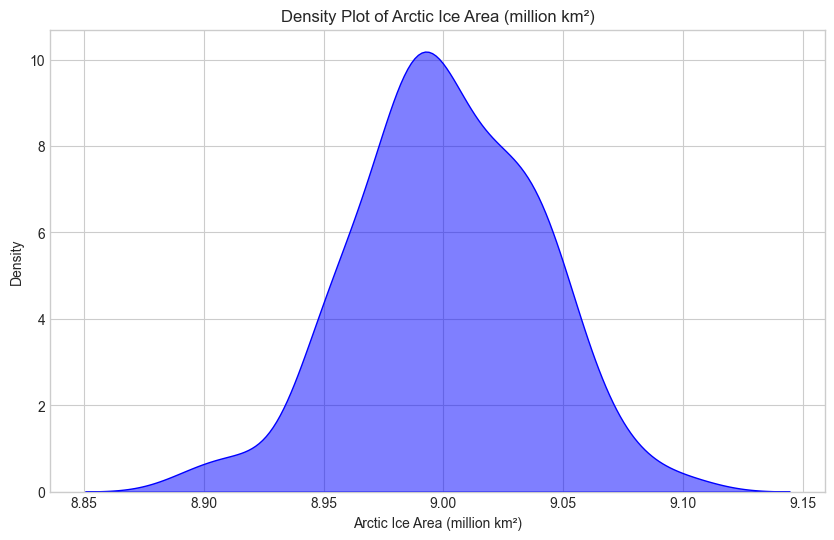

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


In [9]:
# Density plot for Arctic ice area
print(f"Kde Density Plot for {arctic_ice_area}")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=yearly_data, x=arctic_ice_area, fill=True, color="blue", alpha=0.5)
plt.title(f'Density Plot of {arctic_ice_area}')
plt.show()
print(yearly_data[arctic_ice_area].describe())

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [10]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
# Calculate correlation matrix
correlation_matrix = yearly_data.corr()
print(correlation_matrix)

                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.044397   
Global Average Temperature (°C) -0.044397                         1.000000   
CO2 Concentration (ppm)          0.082761                        -0.067980   
Sea Level Rise (mm)             -0.081506                         0.003878   
Arctic Ice Area (million km²)   -0.082203                         0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.082761            -0.081506   
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice 

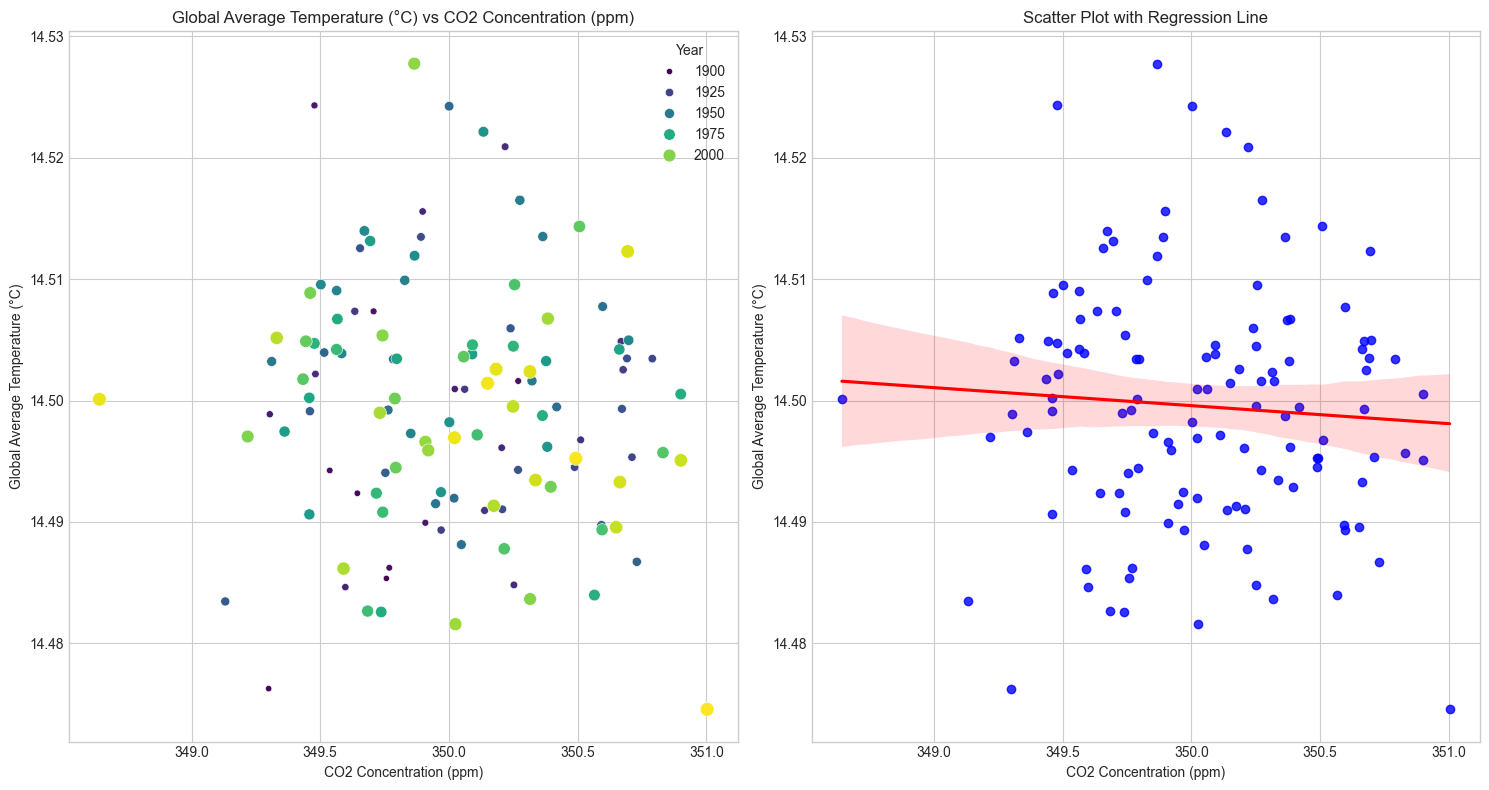

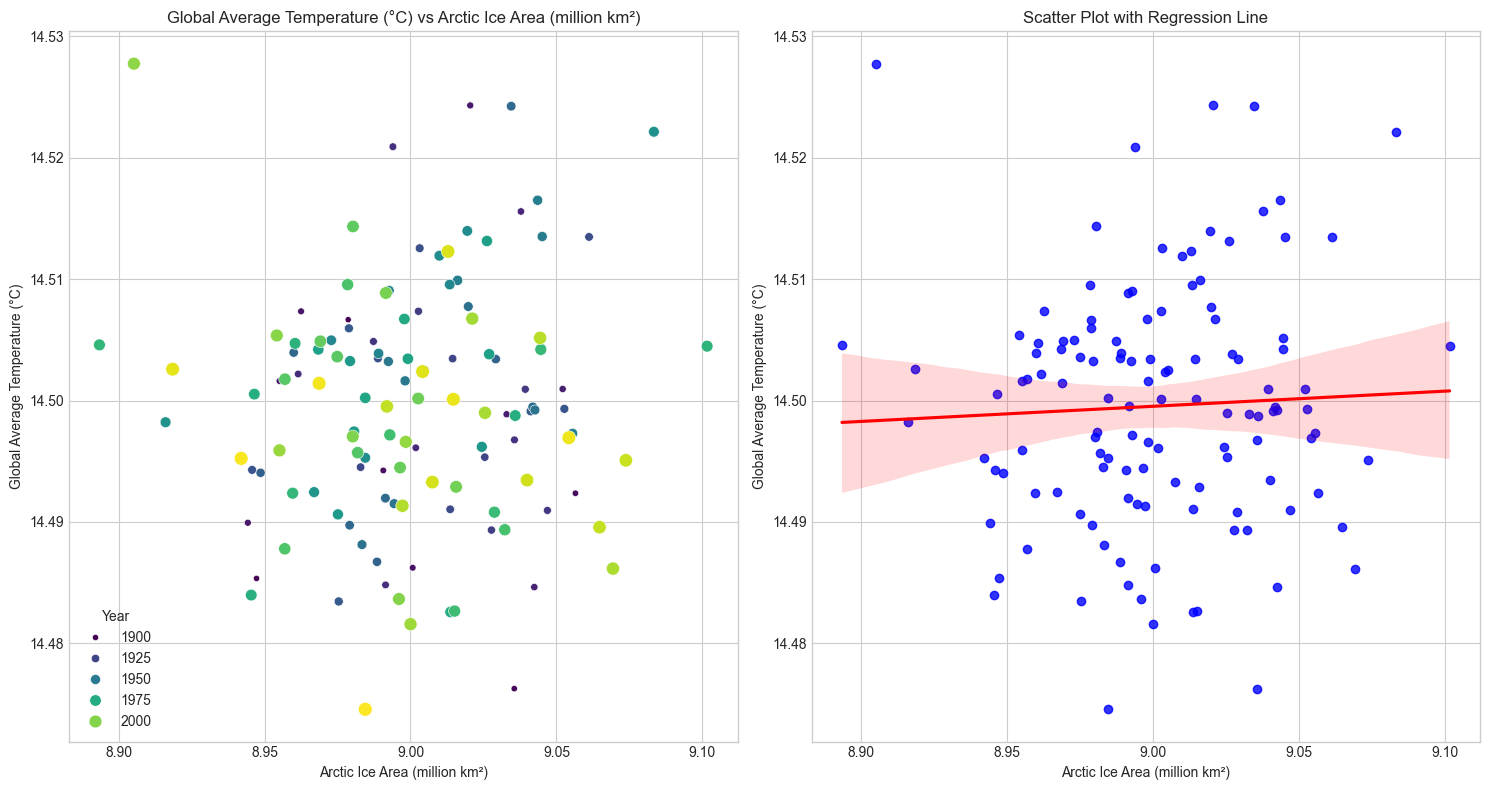

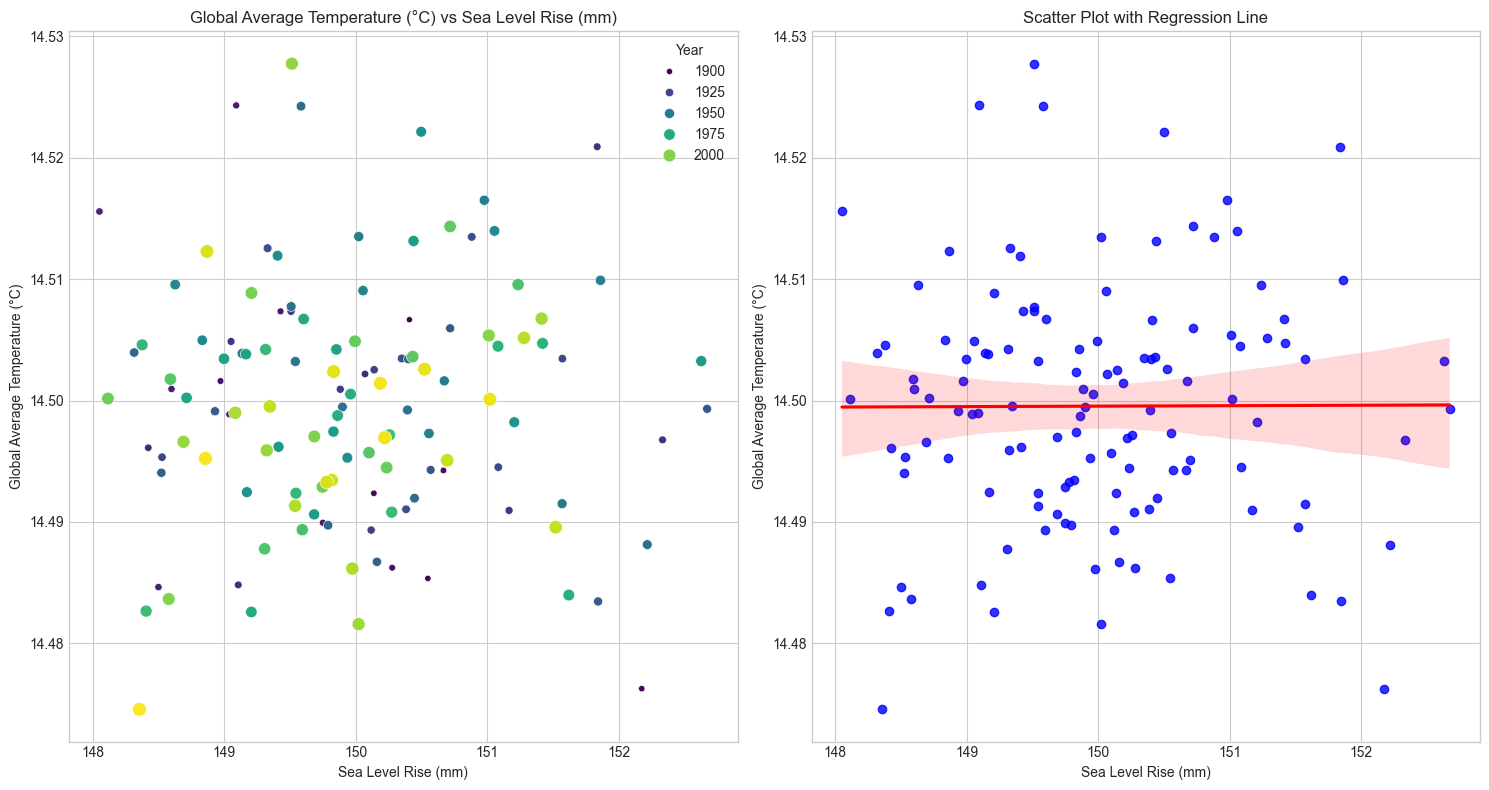

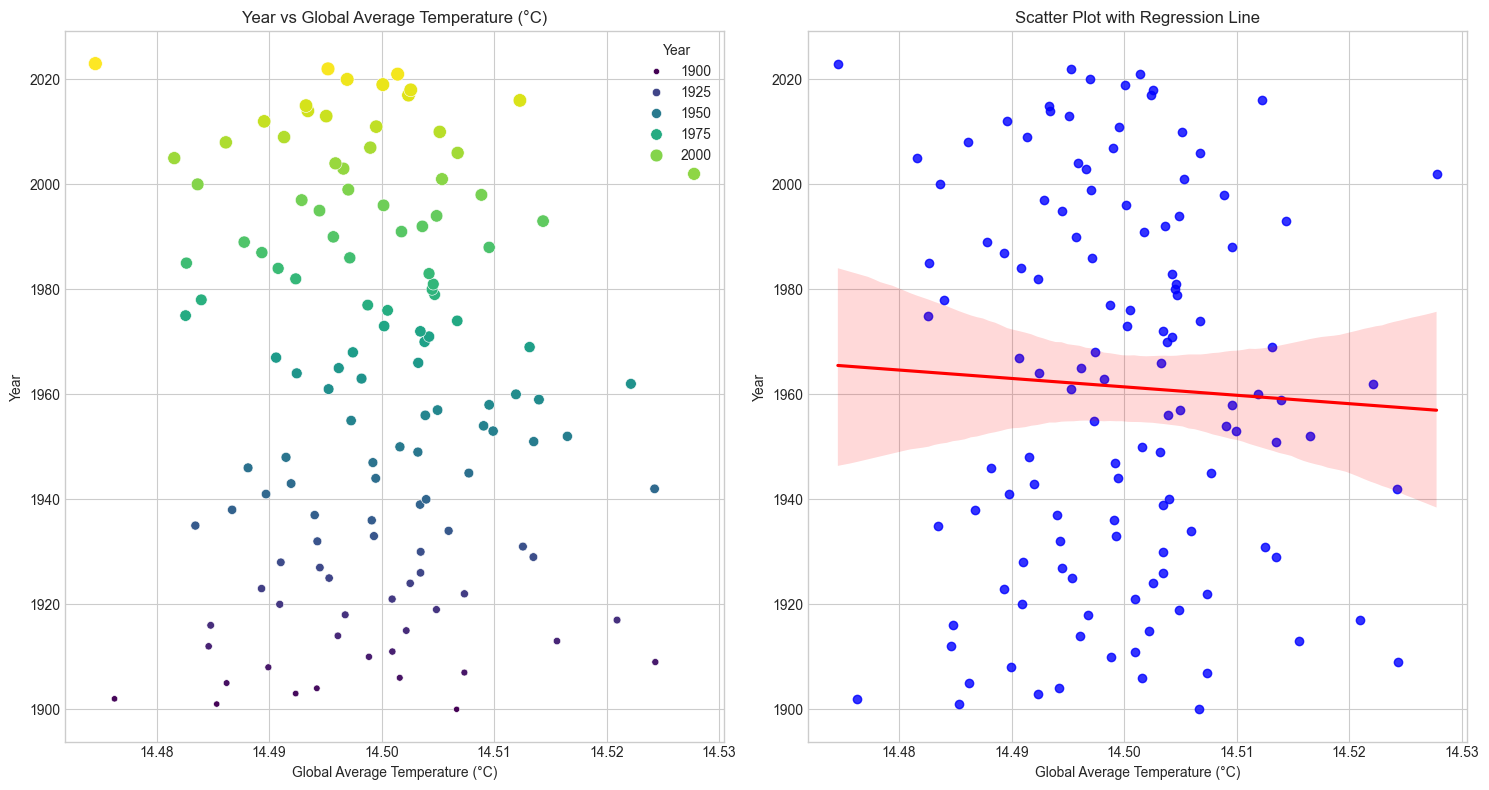

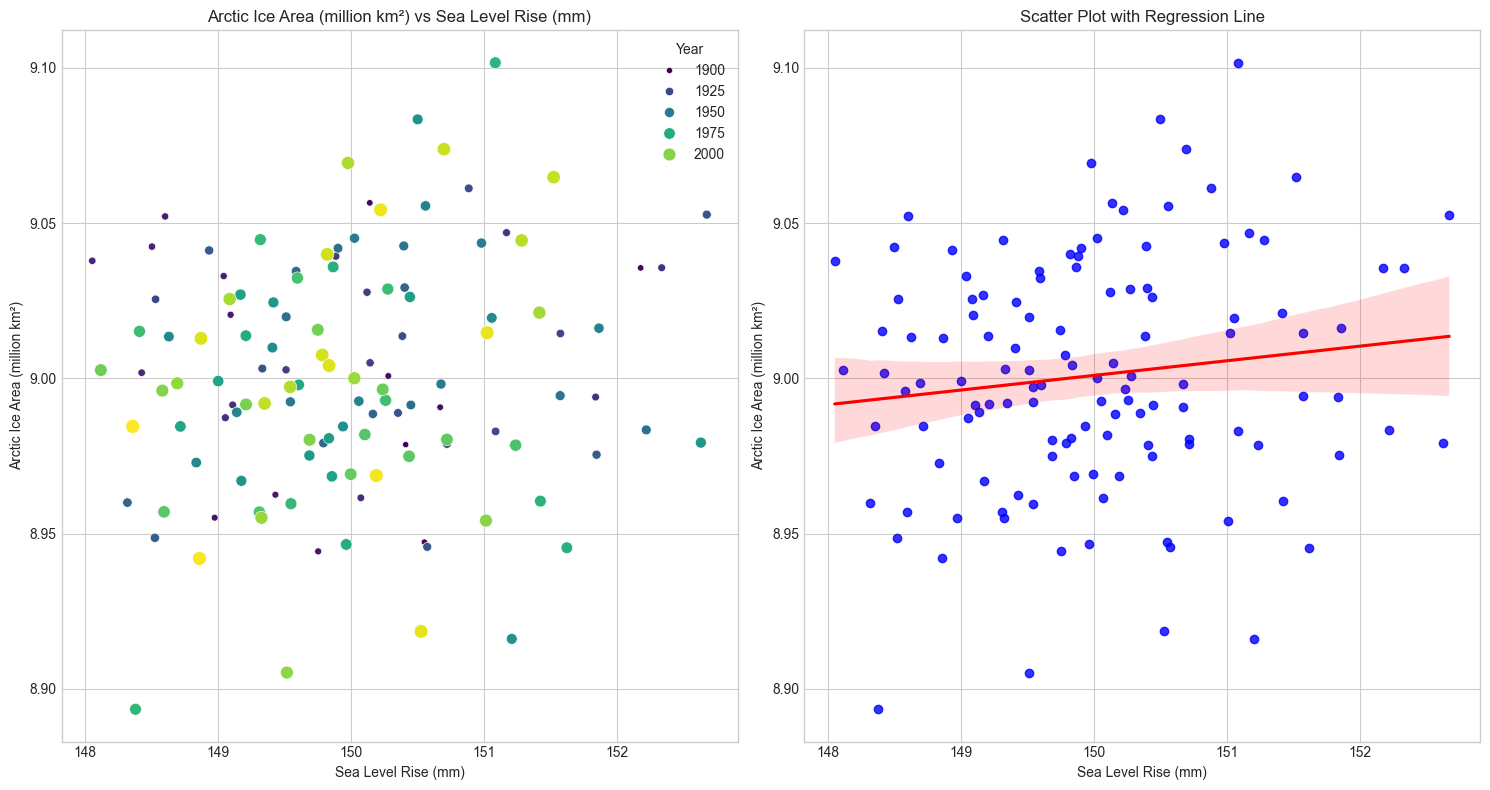

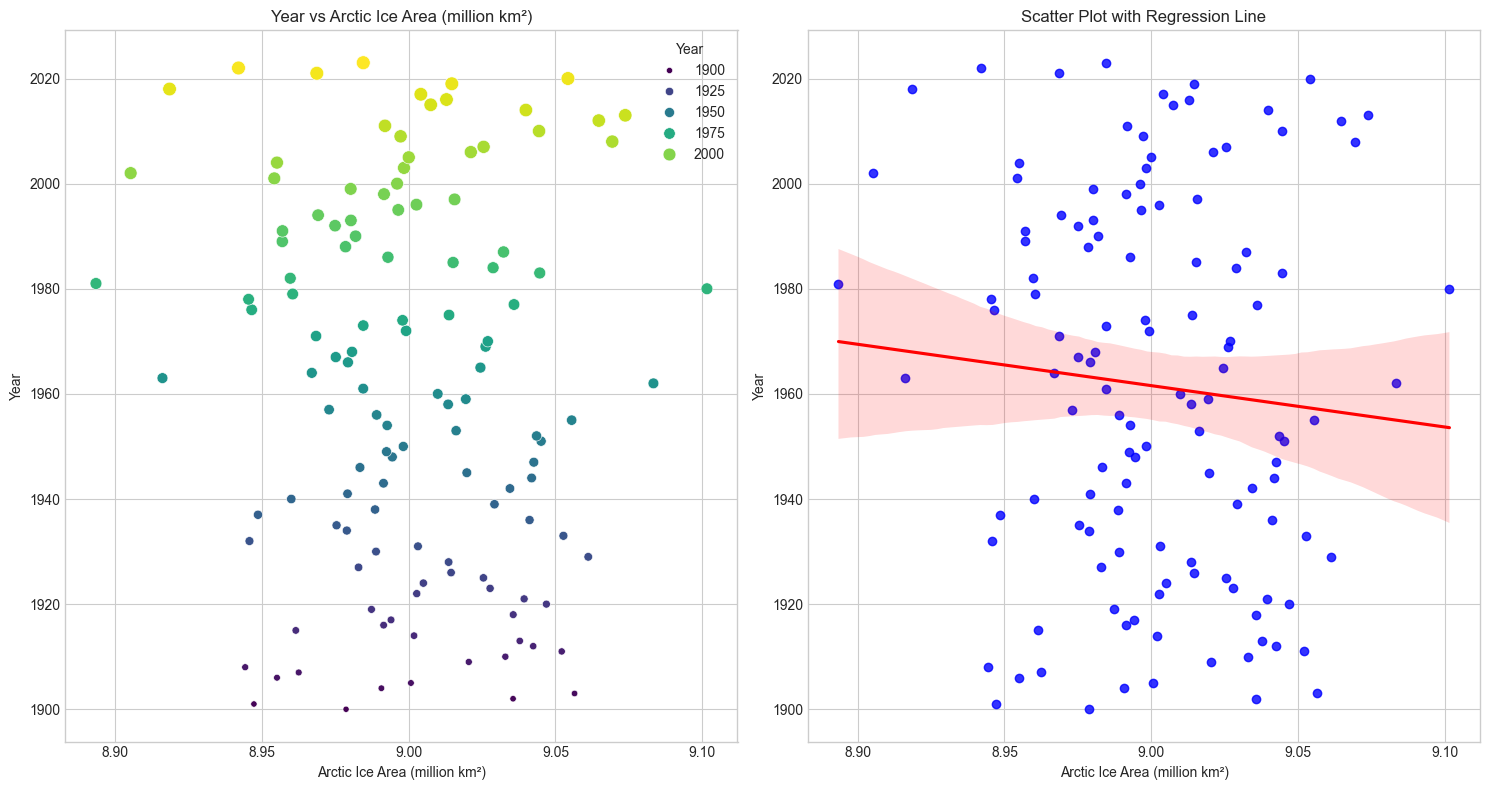

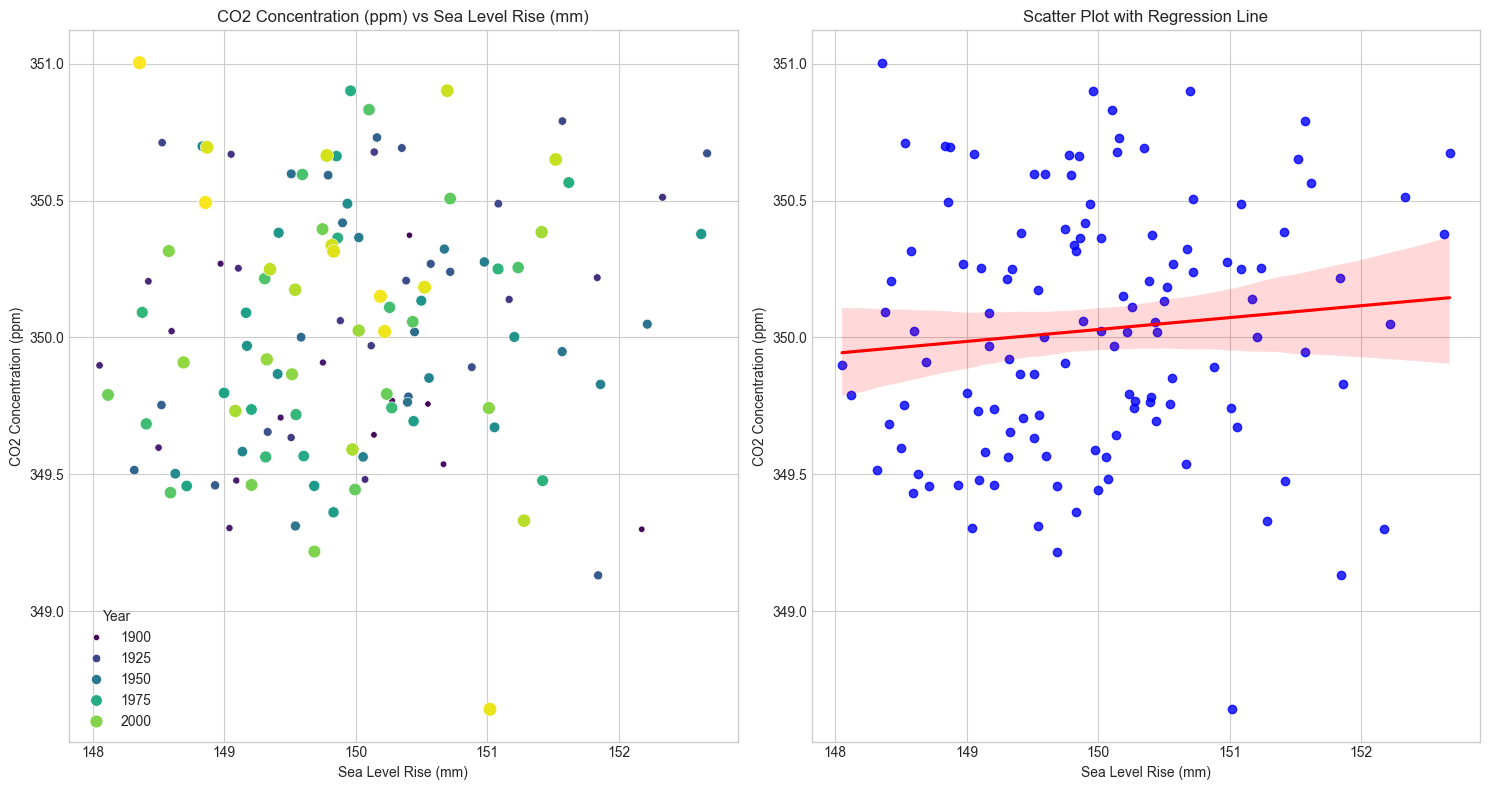

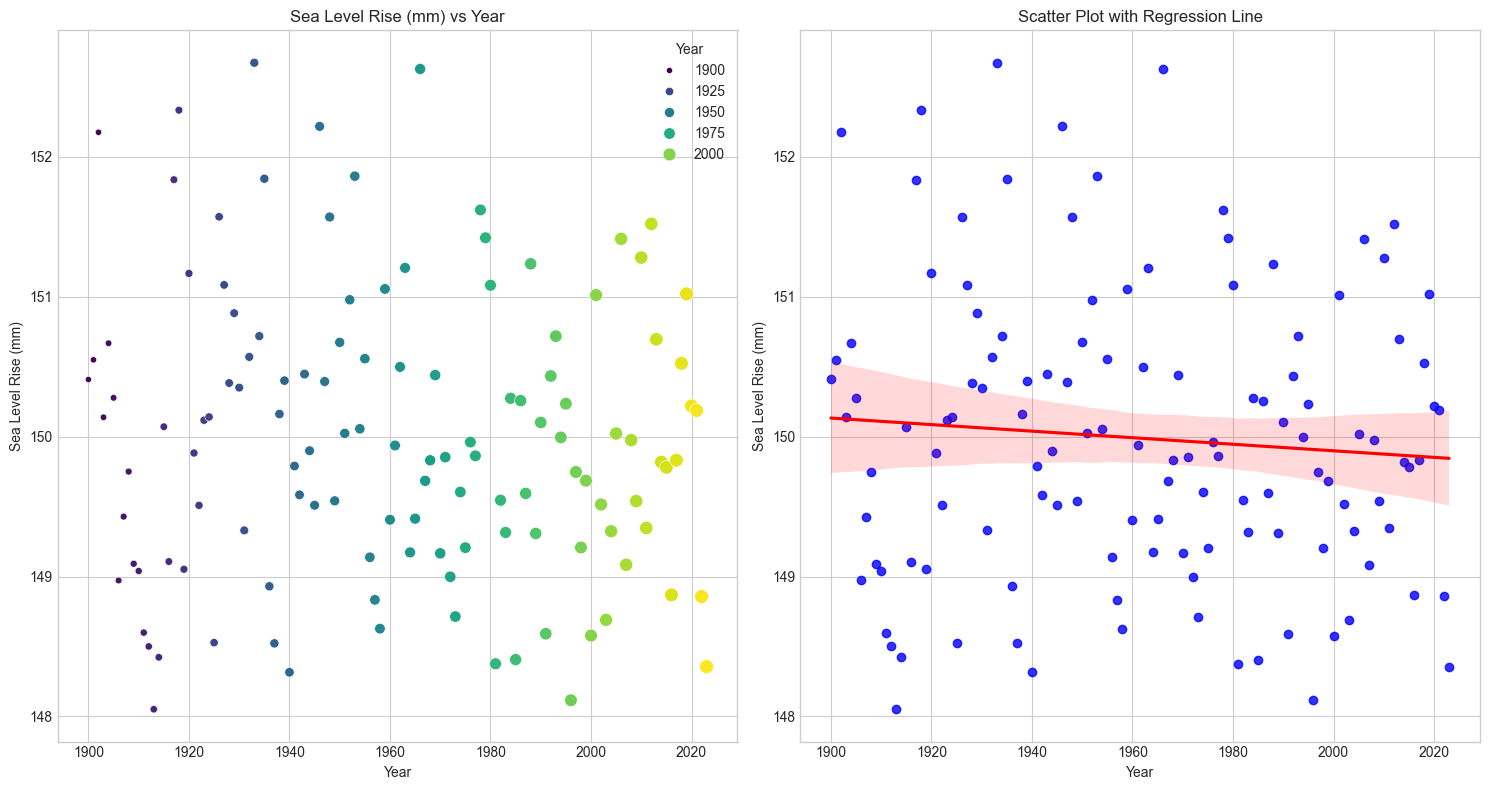

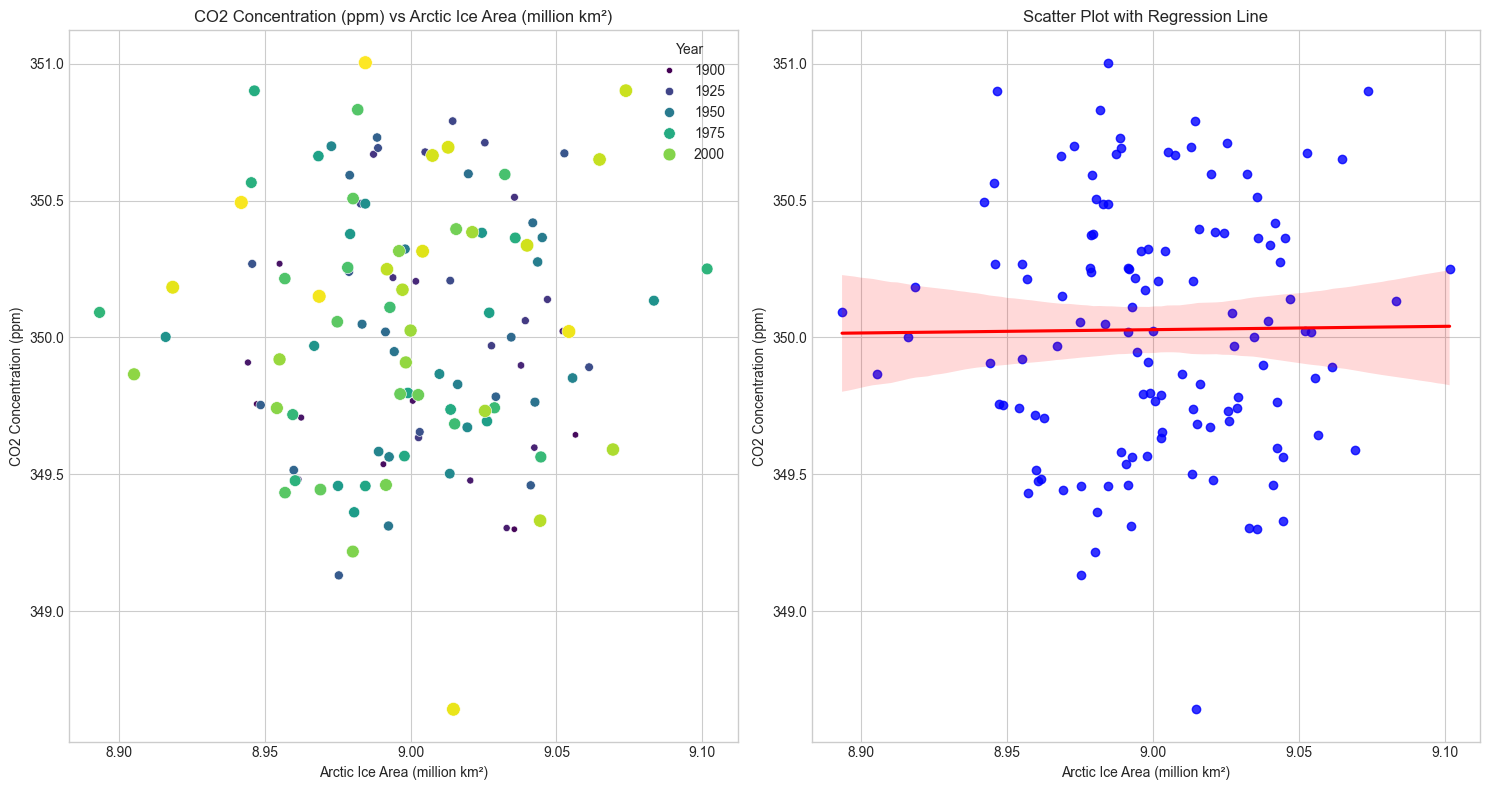

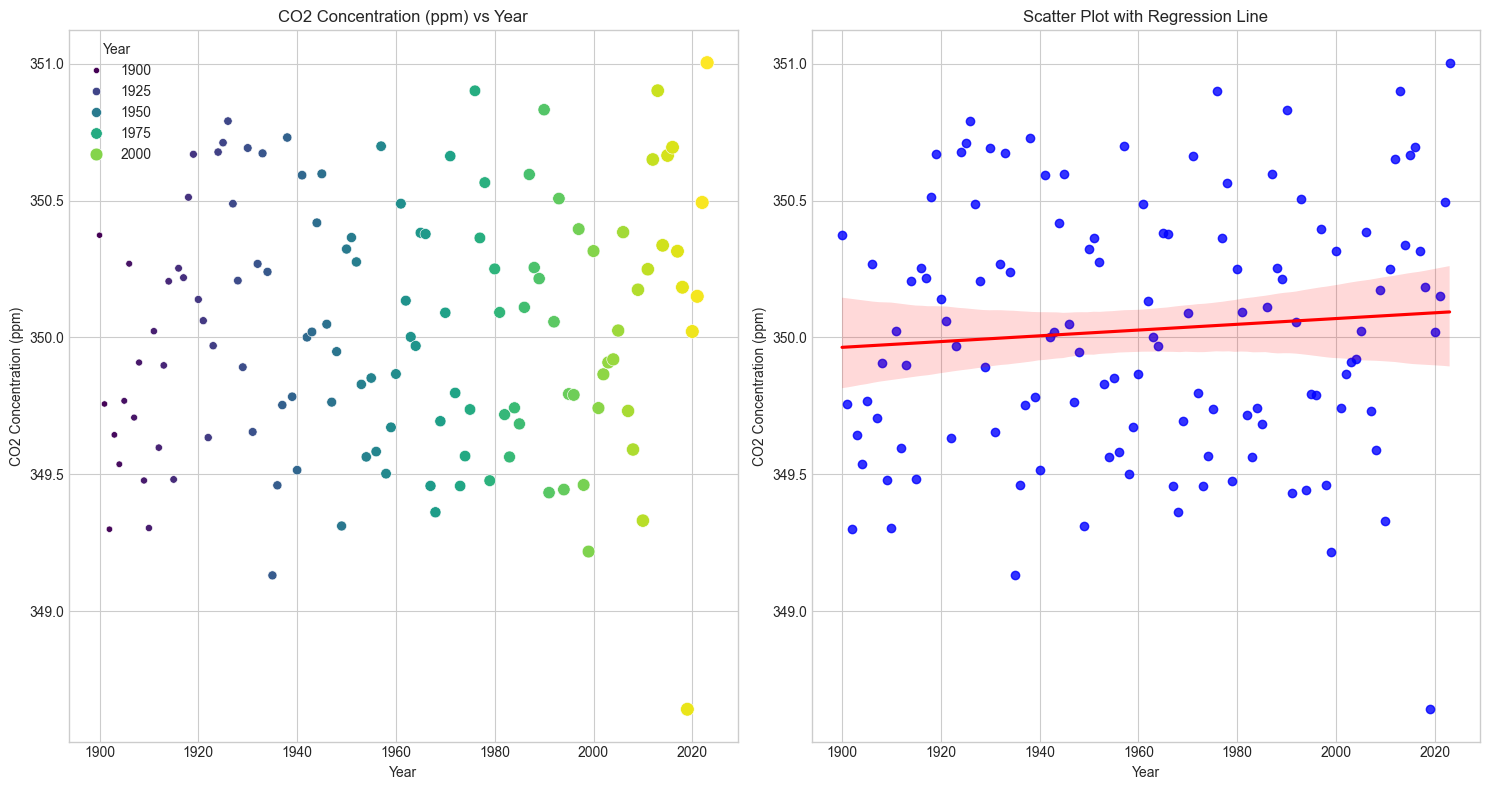

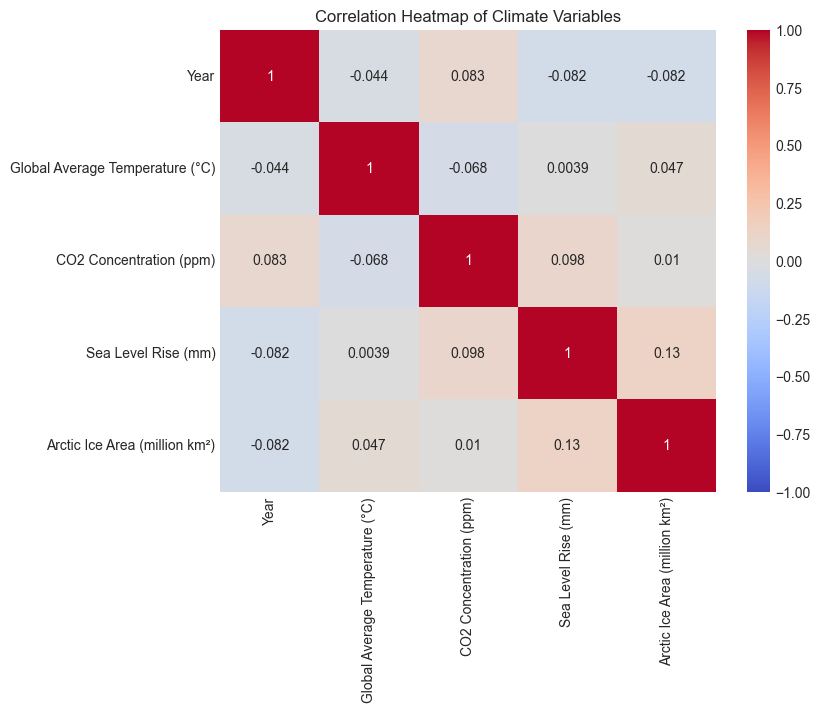

In [12]:
# function for scatter plot with regplot
def scatter_regplot(data, x, y):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=x, y=y,  hue=year, size=year, sizes=(20,100), palette="viridis")
    plt.title(f"{y} vs {x}")
    plt.grid(True)

    # Regplot with Best-Fit Line
    plt.subplot(1, 2, 2)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title("Scatter Plot with Regression Line")
    plt.tight_layout()
    plt.show()
    return

# Scatter plot: Temperature vs CO2 Concentration
scatter_regplot(yearly_data,co2_concentration,avg_temperature)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, arctic_ice_area, avg_temperature)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, avg_temperature)
scatter_regplot(yearly_data, avg_temperature, year)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, arctic_ice_area)
scatter_regplot(yearly_data, arctic_ice_area, year)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, co2_concentration)
scatter_regplot(yearly_data, year, sea_level_rise)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, arctic_ice_area, co2_concentration)
scatter_regplot(yearly_data, year, co2_concentration)
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

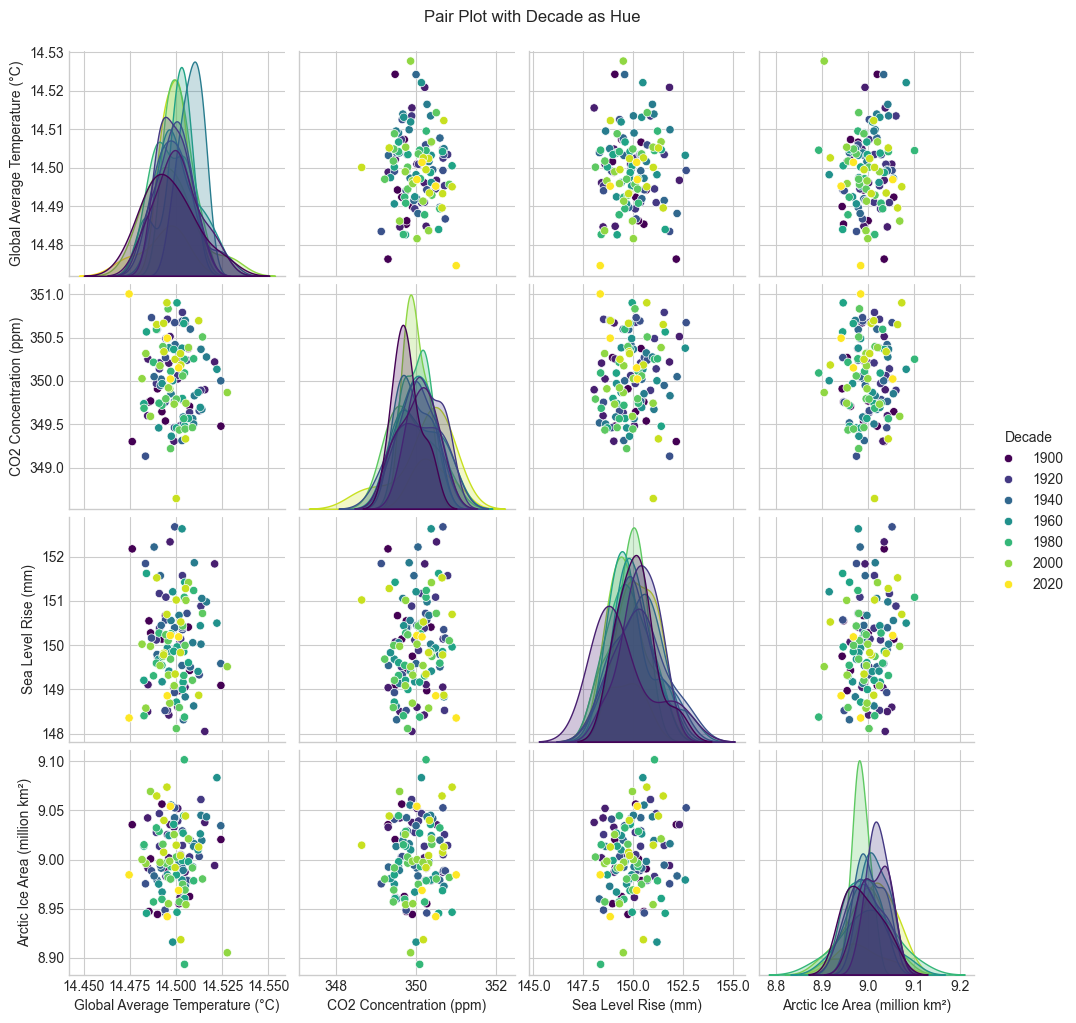

In [13]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Add a decade column for coloring
yearly_data['Decade'] = (yearly_data[year] // 10) * 10

# Pair plot with hue
sns.pairplot(yearly_data, vars=[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area], hue='Decade', palette='viridis')
plt.suptitle('Pair Plot with Decade as Hue', y=1.02)
plt.show()

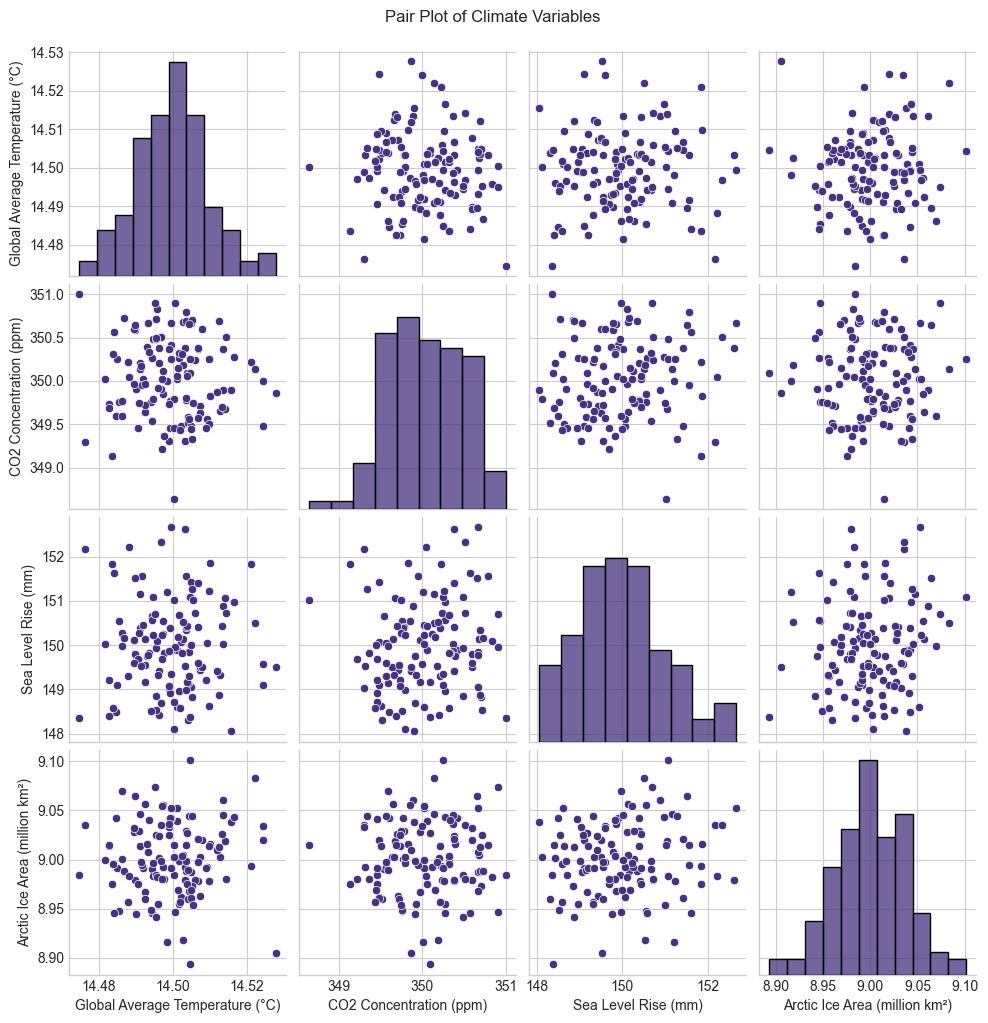

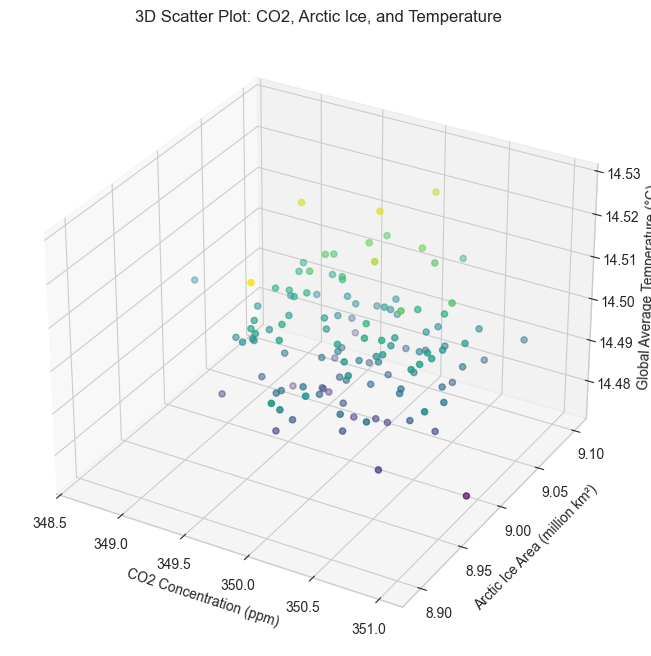

3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature


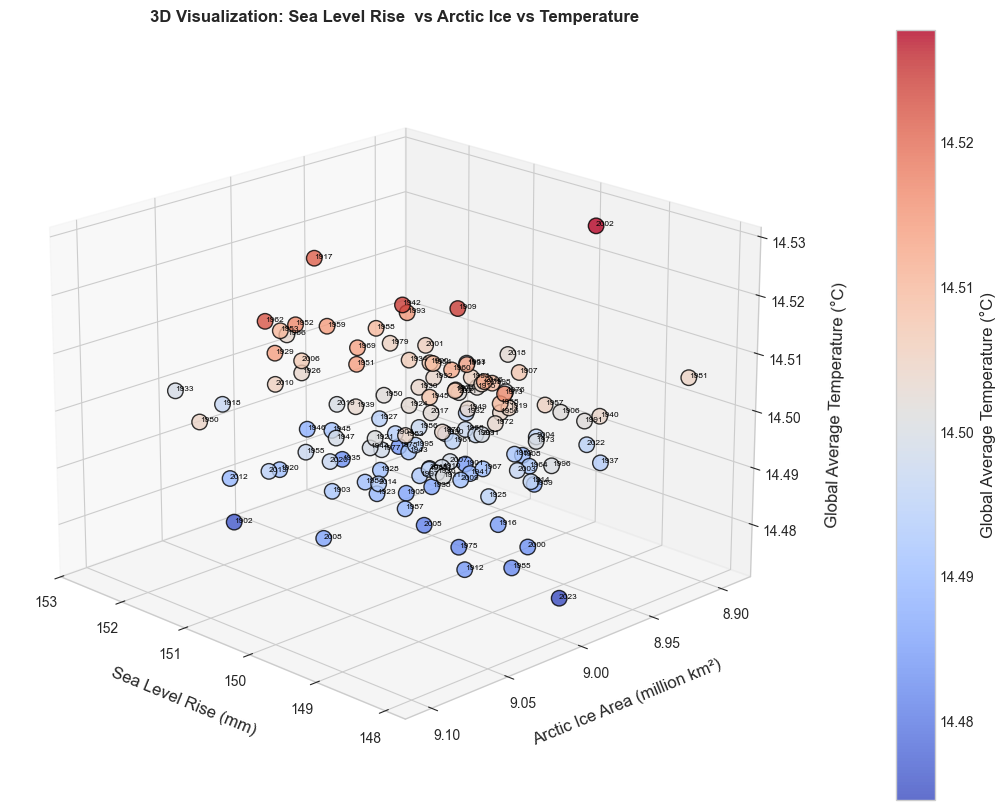

In [14]:
# Pair plot for all variables
sns.pairplot(yearly_data[[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area]])
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    yearly_data[co2_concentration],
    yearly_data[arctic_ice_area],
    yearly_data[avg_temperature],
    c=yearly_data[avg_temperature],
    cmap='viridis'
)
ax.set_xlabel(co2_concentration)
ax.set_ylabel(arctic_ice_area)
ax.set_zlabel(avg_temperature)
plt.title('3D Scatter Plot: CO2, Arctic Ice, and Temperature')
plt.show()
# 3d plot
print("3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature")
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#defining variable
x = yearly_data[sea_level_rise]
y = yearly_data[arctic_ice_area]
z = yearly_data[avg_temperature]
#create scatter plot with color mapping
sc = ax.scatter(x, y, z,c=z, cmap='coolwarm', marker =".", s=500, edgecolor='k', alpha=0.8)

# add color bar for temperature gradient

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label(avg_temperature, fontsize=12)


#Gird and view angle
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.view_init(elev=20, azim=135) #adjusitn the view angle

#Labels and title
ax.set_xlabel(sea_level_rise, fontsize=12, labelpad=12)
ax.set_ylabel(arctic_ice_area, fontsize=12, labelpad=12)
ax.set_zlabel(avg_temperature, fontsize=12, labelpad=12)
ax.set_title("3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature", fontsize=12, fontweight='bold')

# Annotate points with years
for i in range(len(yearly_data)):
    ax.text(x[i], y[i], z[i], f"{yearly_data['Year'][i]}", fontsize=6, color='black')
plt.show()

Andrew Curve Analysis
        Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    0.00000                         0.603422                 0.733216   
1    0.00813                         0.202688                 0.472202   
2    0.01626                         0.032007                 0.278452   
3    0.02439                         0.334585                 0.424442   
4    0.03252                         0.369933                 0.378977   
..       ...                              ...                      ...   
119  0.96748                         0.480166                 0.000000   
120  0.97561                         0.420621                 0.584268   
121  0.98374                         0.504947                 0.638723   
122  0.99187                         0.388580                 0.783879   
123  1.00000                         0.000000                 1.000000   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)    Decade  
0               0.510

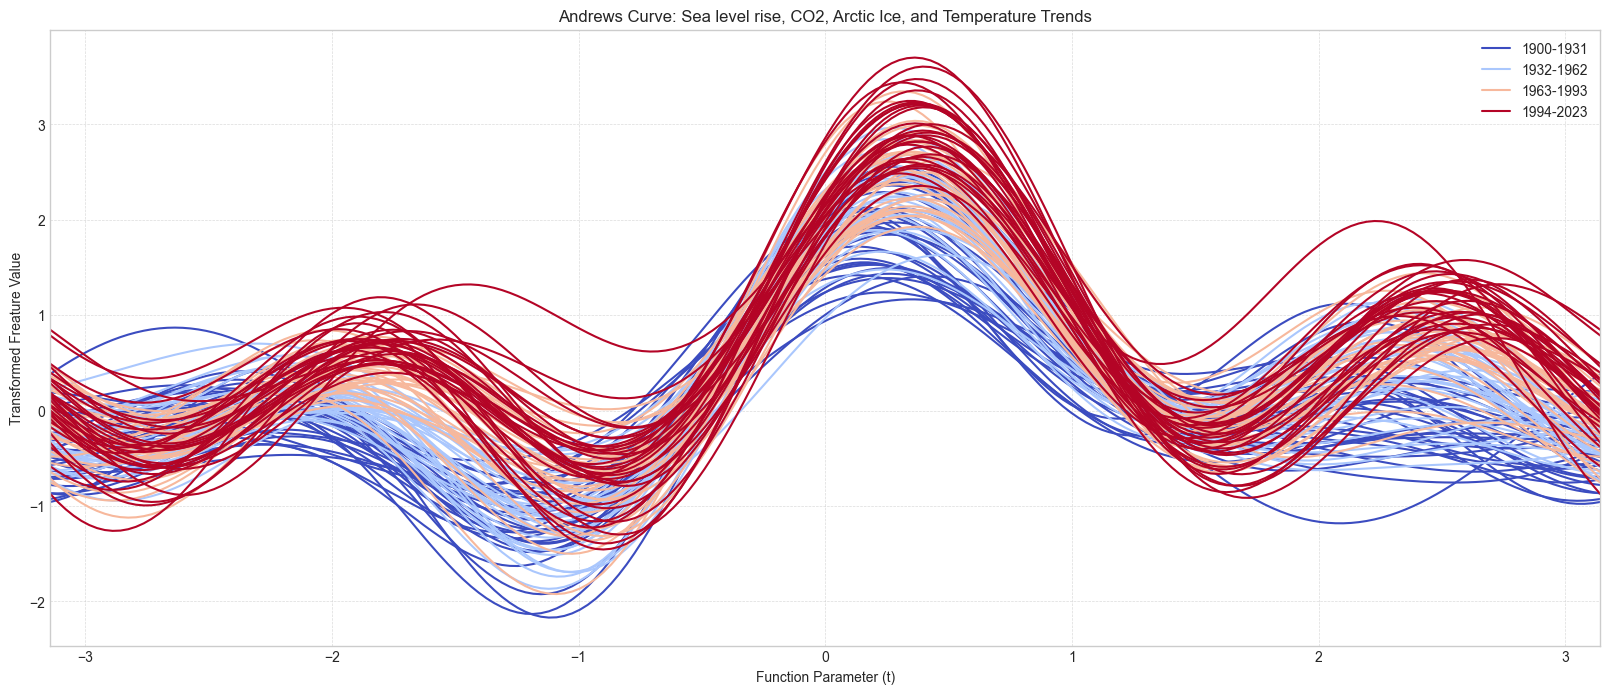

In [15]:
from pandas.plotting import andrews_curves
print("Andrew Curve Analysis")
#Normalizing data for better visualization
yearly_data_scaled = (yearly_data - yearly_data.min())/(yearly_data.max() - yearly_data.min())
print(yearly_data_scaled)

# Add categorical column for visualization
yearly_data_scaled["Year Group"] = pd.cut(yearly_data["Year"], bins=4, labels = ["1900-1931", "1932-1962", "1963-1993","1994-2023"])
#print(yearly_data_scaled)

# Plotting andrews curves
plt.figure(figsize=(20,8))
andrews_curves(yearly_data_scaled, "Year Group", colormap = "coolwarm")
plt.title("Andrews Curve: Sea level rise, CO2, Arctic Ice, and Temperature Trends")
plt.xlabel("Function Parameter (t)")
plt.ylabel("Transformed Freature Value")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
1. Global Temperature & CO2: Both global temperatures and CO2 levels have increased over the past century, with sharp rises after the mid-20th century.
2.Sea Levels: Sea levels are steadily rising, accelerating in recent decades, likely due to melting ice and thermal expansion.
3.Arctic Ice: Arctic ice is decreasing, with a noticeable decline in recent decades, contributing to rising temperatures.
Implications:

Rising temperatures, CO2, and sea levels are major environmental concerns, leading to extreme weather events and loss of biodiversity.
Coastal regions face significant risks from rising sea levels.
Economic impacts include damage to infrastructure and disruptions in agriculture.
Further Investigation:

Investigate regional differences in climate trends.
Look into the impact of specific events (e.g., industrialization) on climate.
Consider predictive models to forecast future climate trends.

# TODO: Write your conclusions here